# Sean McWhirter
# NLP HW 7

In [194]:
from nltk.metrics import *
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
import requests
import string

In [2]:
# Read in spreadsheet with links
df = pd.read_excel(r'C:\Users\seans\Desktop\NLP\HW5\permalinks.xlsx', header=None)

#convert to list to iterate through
link_list = df[0].tolist()

# 1.

>In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.  

In [330]:
#set up to remove stopwords
new_stops = list(stopwords.words('english'))

new_stops = new_stops + ['show', 'episode', 'it', 'get', ' it.', 'it\'s', 'series', 'season', 
                         'can', 'no', 've', 'watch', 'watched', 'much', 'lot', 'thus', 'no', 'need', 'needed', 'should\'ve',
                        'it,', 'can.', 'can,']
stop_words = new_stops

In [333]:
output = []

#Append reviews to a list for vectorizer

for i in link_list:
    lst = []
    page = requests.get(i)
    soup = BeautifulSoup(page.content, 'html.parser')
    span = str(soup.find('div', attrs={'text show-more__control'}).text).strip().lower()
    for i in span.split(' '):
        if i not in stop_words:
            lst.append(i)
    span_nostop = ' '.join(lst)
    
    #span_nostop = ' '.join([i for i in span if i not in stop_words])
    #tokenized = word_tokenize(span)
    #tagged = nltk.pos_tag(tokenized)
    #chunked = np.parse(tagged)
    #for subtree in chunked.subtrees():
       # if subtree.label() == 'NP':
            #lst.append(subtree)
    #span = [i for i in span if i not in string.punctuaion]
    output.append(str(span_nostop))


In [334]:
#Check output
output

['started watching brilliant spin superhero dinner. 4 whole thing.from first glued exciting, interesting crazy ride.',
 'superheroed never ending train films welcome relief. kids love choice language appropriate.',
 'excellent dystopian reimagining superhero nerds. surprising, violent, always twisting. binge-watched 2 days! glad second season, though impatient! thumbs up.',
 "first interesting take whole superhero genre. there's also more. great actors, great storyline nice picture. guess best superhero yet, followed titans umbrella academy.",
 'around world global obsession superhero comic characters even though real, billion dollar industry them. would even imagine franchise would endure came real life! franchise would become one quite easily. comes boys !easily might become greatest first superhero tv ever, competing marvels daredevil ofcourse. scrip freaking impressive, top violence gore along great dialogues brilliant acting easily brings top. would really surprised two kiwi lead 

In [335]:
#create vectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})

In [336]:
#Perform tf-idf on reviews
links_vect = vectorizer.fit_transform(output)

In [337]:
#Look at shape
links_vect.shape

(100, 2547)

In [338]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://scikit-learn.org/stable/modules/clustering.html#k-means
#https://matplotlib.org/tutorials/introductory/pyplot.html
#################################inertia_ is the sum of squared distance from cluster center#################################

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #import matplotlib to examine intracluster distnaces

#Cluster
kmeans = KMeans(n_clusters=5, random_state=11)
clustered = kmeans.fit(links_vect)

In [339]:
#examine distance
clustered.inertia_

90.5436667012645

In [340]:
#Since we don't really know what 90.5 means, let's chart some different K's and see where the elbow is

dist = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=11)
    clustered = kmeans.fit(links_vect)
    dist.append(clustered.inertia_)

Text(0, 0.5, 'Sum of Squared Distance (intracluster)')

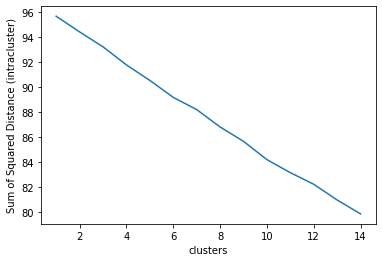

In [341]:
#plot the intracluster distances
plt.plot(range(1,15), dist)
plt.xlabel('clusters')
plt.ylabel('Sum of Squared Distance (intracluster)')

Looks like we may have something from 2-4, and something around 6.  We will try both of those.

In [342]:
#Examine 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=11)
clustered = kmeans.fit(links_vect)

In [343]:
clustered.labels_

array([2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1,
       2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2,
       1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0])

In [344]:
clustered.labels_.shape

(100,)

In [351]:
#https://pythonprogramminglanguage.com/kmeans-text-clustering/

#Print top words of each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
words = vectorizer.get_feature_names()
for i in range(3):
    print("cluster:", i)
    for j in order_centroids[i, :10]:
        print(words[j])

cluster: 0
office
pam
michael
leads
character
jenna
jim
time
scott
fischer
cluster: 1
version
american
original
british
bad
office
would
uk
funny
people
cluster: 2
please
fun
this
enjoyable
karl
urban
good
far
superheroes
simon


# 2.a)

> Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact. 

These clusters are a little bit difficult to pin down semantically.  Cluster 0 is obviously referring to the show 'The Office,' but it seems like cluster 1 is as well.  However, cluster one starts to get into some sentiment with words like 'bad' and 'funny.'  Cluster 2 seems to contian positive words such as 'fun,' 'enjoyable,' and 'good,' so maybe it is clustering on those.

#### 6 clusters

In [346]:
#Examine 6 Clusters
kmeans = KMeans(n_clusters=6, random_state=11)
clustered = kmeans.fit(links_vect)
clustered.labels_
#https://pythonprogramminglanguage.com/kmeans-text-clustering/

#Print top words of each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
words = vectorizer.get_feature_names()
for i in range(6):
    print("cluster:", i)
    for j in order_centroids[i, :10]:
        print(words[j])

cluster: 0
good
enjoyable
bad
like
seasons
fun
far
liberal
first
this
cluster: 1
original
version
american
british
bad
can
seen
shows
one
funny
cluster: 2
park
south
jokes
episodes
ve
people
episode
like
the
actually
cluster: 3
show
love
office
one
michael
funny
great
comedy
even
characters
cluster: 4
superhero
great
interesting
first
happened
whole
came
excellent
shoes
don
cluster: 5
cool
superheroes
this
done
before
like
driven
entertaining
kids
character


# 2.b)

> Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact. 

Cluster 0 seems to contain a lot of sentiment, with the top there words being ‘good,’ ‘enjoyable,’ and ‘bad.’  It contains others such as ‘fun’ and ‘like’ as well.  Cluster 1 seems to be centered around the US vs UK version of ‘The Office,’ with the top four words being ‘original,’ ‘version,’ ‘american,’ and ‘british.’  Cluster 2 seems to be centered around ‘South Park.”  Cluster 3 seems to be centered around “The Office” again, but more towards the sentiment around the show with words like ‘great’, ‘love,’ ‘funny,’ and ‘comedy.’  Cluster 4 seems to be centered on the show ‘The Boys’ given the top word being ‘superhero.’  It also contains some sentiment with words like ‘great,’ ‘interesting,’ and ‘excellent.’   Cluster 5 seems to be extremely similar, mentioning superheroes and sentiment words such as ‘cool’ and ‘entertaining.’   

# 3. 

>Explain which of the two clustering results from question 1 is preferable (if one of them is), and why. 

I would go with the clustering results form k=6.  We get a lower inertia between the observaitions within clusters, and the top words of  each cluster seem to be better separated than k=3. 

# Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings. 

Overall, I was surprised at the inertia graph and how it was almost perfectly linear. After thinking about it, it does make some sense given the shows were all from the same genre.  I also ran into a bit of trouble with sklearn's TfidfVectorizer.  It was branded as fully pre-processing the text, but it was not removing any stop words, so I had to build that into the review aggregator loop.  

It seems that three clusters was not enough, but 6 may have been too much given the overlp with clusters 4 and 5.  It would be difficult to turly zero this in with Kmeans, as there are no drastic change in sum of squared distance as we increase the number of clusters.